In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.convert_matrix import from_pandas_edgelist
from networkx.classes.function import number_of_nodes
from networkx.algorithms.centrality import degree_centrality,betweenness_centrality,load_centrality,eigenvector_centrality
from networkx.algorithms.cluster import average_clustering
import itertools
import warnings 
warnings.filterwarnings("ignore")
from networkx.algorithms.community.centrality import girvan_newman
import community

# easy practice

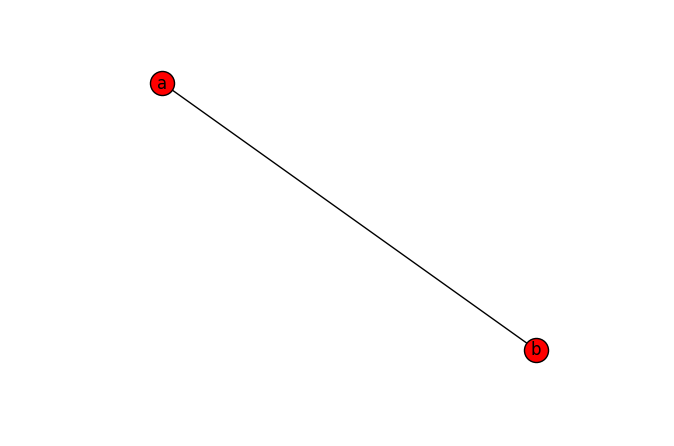

In [153]:
#graphの初期化
G = nx.Graph()
#edge の追加
G.add_edge("a","b")
nx.draw(G,with_labels=True)

In [154]:
G.add_edges_from([("c","d"),("a","d"),("a","c")])

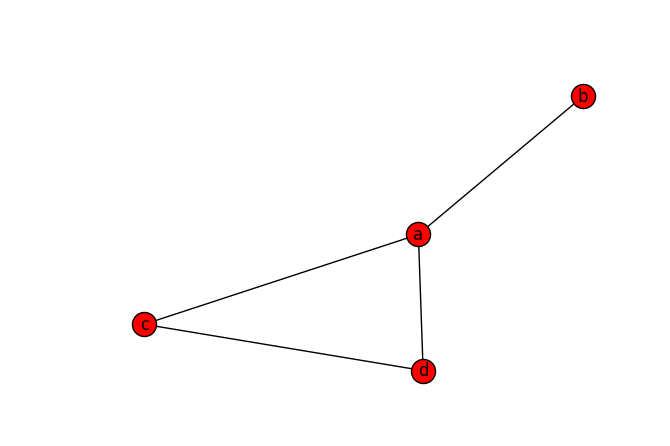

In [155]:
nx.draw(G,with_labels="True",pos=nx.spring_layout(G,k=0.5))

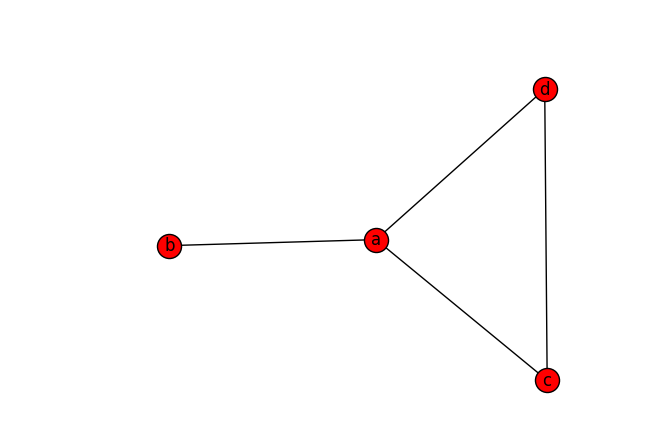

In [156]:
pos=nx.spring_layout(G,k=0.5)
nx.draw(G,pos=pos, with_labels = True)

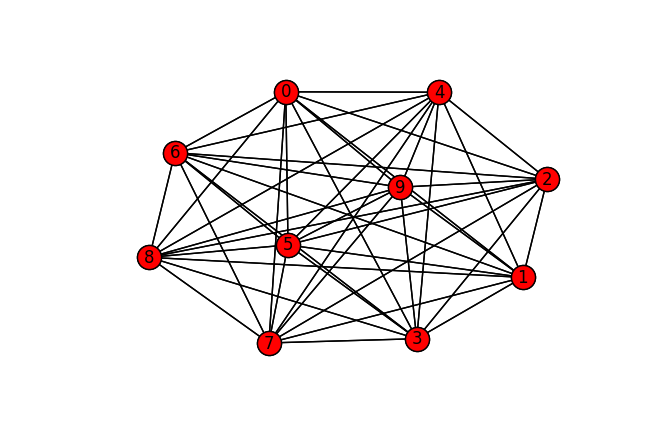

In [157]:
G = nx.complete_graph(10)
pos=nx.spring_layout(G,k=0.5)
nx.draw(G,pos=pos, with_labels = True)
nx.draw(G,pos=pos)

In [158]:
print(list(G.nodes()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [159]:
print(list(G.edges()))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


# midium network by using "karate club"

In [160]:
network_df = pd.read_csv("karate.csv",index_col = 0)
network_df.head()

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [161]:
G = from_pandas_edgelist(network_df, source="from",target="to")
pos = nx.spring_layout(G,k=0.1)

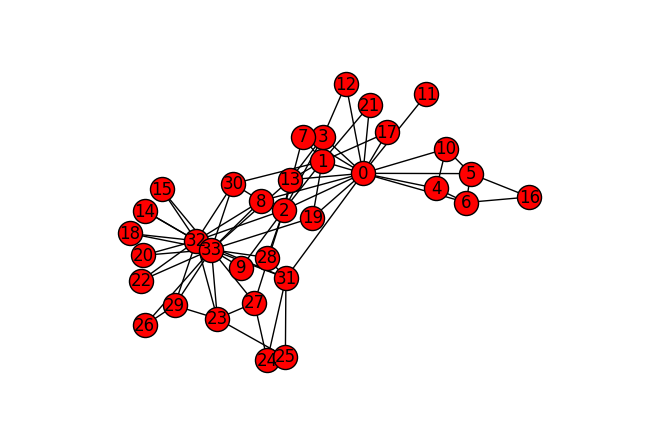

In [162]:
nx.draw(G,pos=pos,with_labels="True")

# small world network

In [163]:
# average distance 
print("平均距離",nx.average_shortest_path_length(G))

平均距離 2.408199643493761


In [164]:
# shortest pathからナイーブ実装
n = network_df.shape[0]
distance_list = np.array([])

for i in itertools.combinations(range(number_of_nodes(G)),2):
    from_node = i[0]
    to_node = i[1]
    distance = nx.shortest_path_length(G,source=from_node, target = to_node)
    distance_list = np.append(distance_list,distance)

print("平均最短距離:",sum(distance_list)/len(distance_list))

平均最短距離: 2.40819964349


The shortest path length is much larger than the number of nodes.
It is called a small world network.

# Scale free network

In [165]:
print("the degree of each nodes",G.degree())

the degree of each nodes [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [166]:
degree_list= [i[1] for i in G.degree()]
print(degree_list)

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


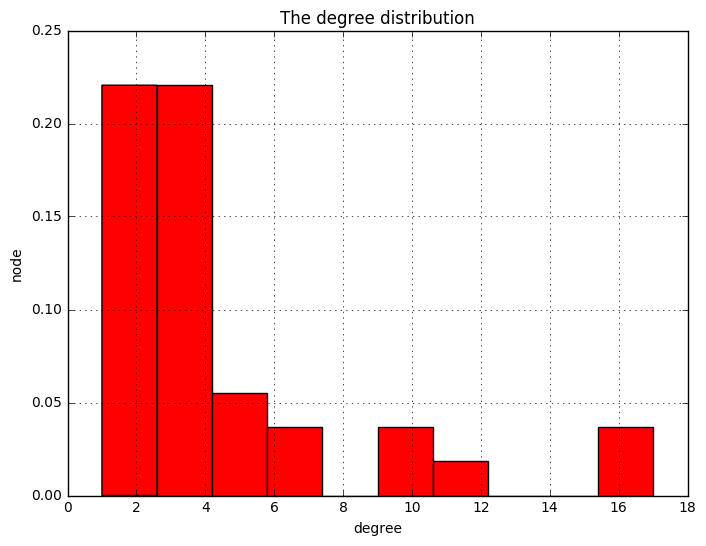

In [167]:
plt.figure(figsize=(8,6))
plt.hist(degree_list,color="red",normed=1)
plt.xlabel("degree")
plt.ylabel("node")
plt.title("The degree distribution")
plt.grid()

The relation between the number of nodes and each node`s degree is above.
The more degree is, the less the number of nodes is. This is called the scale free network.

# the cluster network

In [168]:
print("クラスター係数:",average_clustering(G))

クラスター係数: 0.5706384782076823


The cluster coefficient is medium. This seems because there are a lot of nodes that does not have cluster. However, as you can see, you can find some clusters, so I should use another indicator to confirm the cluster network.

# centrality

There are a lot of indicators to imply the centrality.

1. Degree centrality(次数中心性) 

In [169]:
degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

2. betweenness centrality(媒介中心性）

その点を通る経路が多いほど大きくなる。

In [170]:
betweenness_centrality(G)

{0: 0.4376352813852815,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976907,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.304074975949976}

In [171]:
max(betweenness_centrality(G).values())

0.4376352813852815

node 1 has the highest betweenness-centrality in G. This means node 1 is the hub.

3. eigenvector centrality(固有ベクトル中心性)

In [172]:
eigenvector_centrality(G)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

4. page rank

In [173]:
nx.pagerank(G)

{0: 0.09700181758983709,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 3: 0.03586064322306479,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.02911334166344221,
 7: 0.024490758039509182,
 8: 0.029765339186167028,
 9: 0.014308950284462801,
 10: 0.021979406974834498,
 11: 0.009564916863537148,
 12: 0.014645186487916191,
 13: 0.029536314977202986,
 14: 0.014535161524273825,
 15: 0.014535161524273825,
 16: 0.016785378110253487,
 17: 0.014558859774243493,
 18: 0.014535161524273825,
 19: 0.019604416711937293,
 20: 0.014535161524273825,
 21: 0.014558859774243493,
 22: 0.014535161524273825,
 23: 0.03152091531163228,
 24: 0.021075455001162945,
 25: 0.021005628174745786,
 26: 0.015043395360629753,
 27: 0.025638803528350497,
 28: 0.01957296050943854,
 29: 0.02628726283711208,
 30: 0.02458933653429248,
 31: 0.03715663592267942,
 32: 0.07169213006588289,
 33: 0.1009179167487121}

# change the node size by centrality

Wanna know who has the most connection among karate club.

Use the degree centrality to express the centrality.

In [174]:
each_degree = degree_centrality(G)
each_degree

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

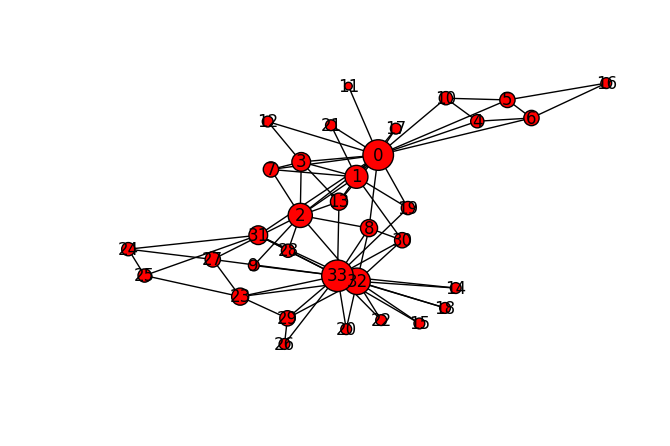

In [175]:
pos = nx.spring_layout(G,k=0.1)
nx.draw(G,with_labels=True,pos = pos,
       node_size = [i[1]*1000 for i in each_degree.items()])

# clustering

## Girvan - newman method

In [176]:
comp = girvan_newman(G)
c_list = list(sorted(c) for c in next(comp))
list(sorted(c) for c in next(comp))

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [9]]

In [177]:
import itertools
k = 4
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
newman_cluster_list = []
for communities in limited:
    newman_cluster_list.append(tuple(sorted(c) for c in communities))
newman_cluster_list

[([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
  [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 ([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
  [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
  [9]),
 ([0, 1, 3, 7, 11, 12, 13, 17, 19, 21],
  [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
  [4, 5, 6, 10, 16],
  [9])]

In [178]:
cluster_list = []
for i in range(number_of_nodes(G)):
    if i in c_list[0]:
        cluster_list.append(0)
    elif i in c_list[1]:
        cluster_list.append(1)
    else:
        cluster_list.append(2)
cluster_list

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [179]:
dic_cluster_list = {}
for i in range(number_of_nodes(G)):
    dic_cluster_list[i] = cluster_list[i]
dic_cluster_list

{0: 0,
 1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 1,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

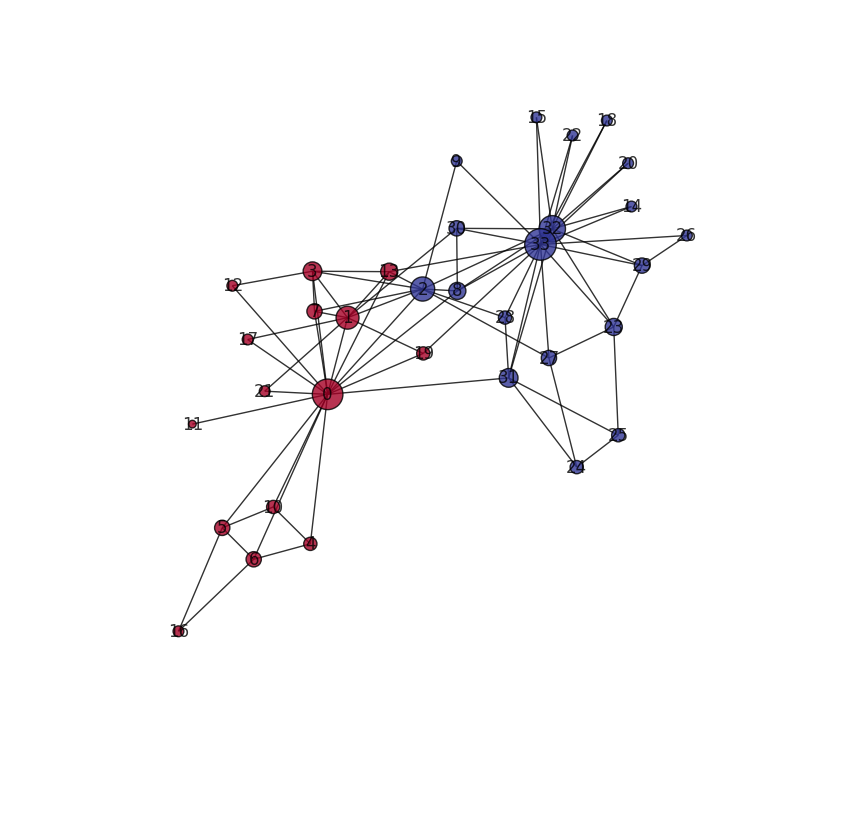

In [180]:
pos = nx.spring_layout(G,k=0.1)
#図の初期化
plt.figure(figsize=(10,10), edgecolor="black")
plt.axis("off")

nx.draw_networkx(G,pos=pos,with_labels=True,
                      node_size = [i[1]*1000 for i in each_degree.items()],
                       node_color = cluster_list,cmap=plt.cm.RdYlBu,alpha=0.8,
                    )
plt.legend()

### Calucurate modularity

In [181]:
community.modularity(dic_cluster_list,G)

0.35996055226824464

# Louvain method

In [182]:
louvain_partition = community.best_partition(G)
louvain_partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 2,
 15: 2,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 31: 3,
 32: 2,
 33: 2}

In [183]:
?nx.draw_networkx

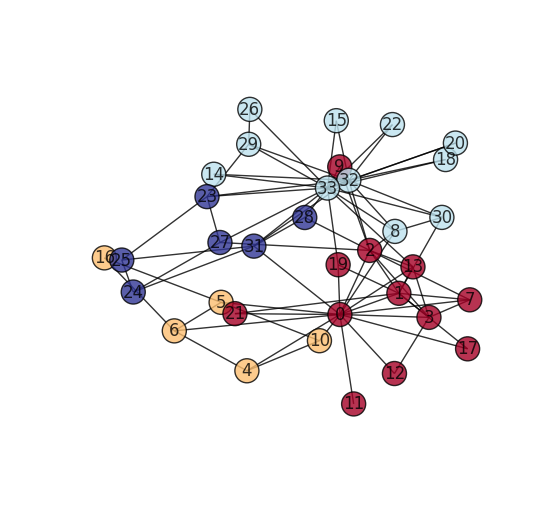

In [184]:
plt.figure(figsize=(6,6))
plt.axis("off")
nx.draw_networkx(G,pos=nx.spring_layout(G,k=0.5),with_labels=True,alpha = 0.8,
                 node_color = list(louvain_partition.values()),cmap=plt.cm.RdYlBu)

In [185]:
community.modularity(louvain_partition,G)

0.4188034188034188

# Adjacency_matrix

In [186]:
matrix = nx.adjacency_matrix(G)
matrix.todense()

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ..., 
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

# 次元を削減してK-Meansでクラスタリング

In [187]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [188]:
matrix = nx.adjacency_matrix(G)

In [189]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [190]:
cluster = kmeans.fit(matrix)

In [191]:
cluster.labels_

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3], dtype=int32)

ValueError: Color array must be two-dimensional

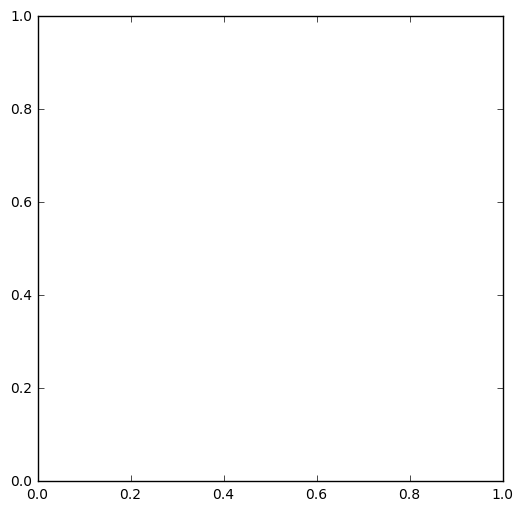

In [192]:
plt.figure(figsize=(6,6))
plt.scatter(x=matrix[:,0],y=matrix[:,1],c=cluster.labels_,cmap= plt.cm.RdYlBu)
plt.axis("off")
plt.grid()

In [193]:
import matplotlib.pyplot as plt

from gem.utils import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr
from time import time

from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
from gem.embedding.sdne     import SDNE

# File that contains the edges. Format: source target
# Optionally, you can add weights as third column: source target weight
edge_f = 'gem/data/karate.edgelist'
# Specify whether the edges are directed
isDirected = True

# Load graph
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()

models = []
# You can comment out the methods you don't want to run
models.append(GraphFactorization(d=2, max_iter=100000, eta=1*10**-4, regu=1.0))
models.append(HOPE(d=4, beta=0.01))
models.append(LaplacianEigenmaps(d=2))
models.append(LocallyLinearEmbedding(d=2))
models.append(node2vec(d=2, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1))
models.append(SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3,n_units=[50, 15,], rho=0.3, n_iter=50, xeta=0.01,n_batch=500,
                modelfile=['./intermediate/enc_model.json', './intermediate/dec_model.json'],
                weightfile=['./intermediate/enc_weights.hdf5', './intermediate/dec_weights.hdf5']))

for embedding in models:
    print ('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
    t1 = time()
    # Learn embedding - accepts a networkx graph or file with edge list
    Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
    print (embedding._method_name+':\n\tTraining time: %f' % (time() - t1))
    # Evaluate on graph reconstruction
    MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
    # Visualize
    viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)
    plt.show()

ImportError: No module named 'gem'